In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data

In [2]:
!pip install pandas_datareader


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import yfinance as yf

start = '2017-01-01'
end = '2030-12-31'

# Retrieve historical stock data for AAPL from Yahoo Finance using yfinance
df = yf.download('AAPL', start=start, end=end)

# Print the first few rows of the DataFrame
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-01-03  28.950001  29.082500  28.690001  29.037500  26.921553  115127600
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.891415   84472400
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.028168   88774400
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.329487  127007600
2017-01-09  29.487499  29.857500  29.485001  29.747499  27.579807  134247600


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200
2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300
2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52958500


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,26.921553,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,26.891415,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.028168,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.329487,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.579807,134247600


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,28.950001,29.082500,28.690001,29.037500,115127600
1,28.962500,29.127501,28.937500,29.004999,84472400
2,28.980000,29.215000,28.952499,29.152500,88774400
3,29.195000,29.540001,29.117500,29.477501,127007600
4,29.487499,29.857500,29.485001,29.747499,134247600


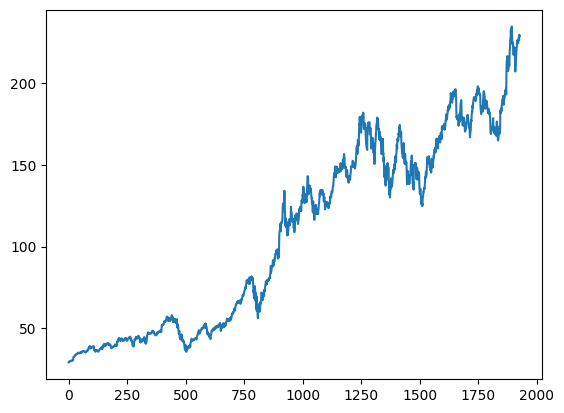

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,28.950001,29.082500,28.690001,29.037500,115127600
1,28.962500,29.127501,28.937500,29.004999,84472400
2,28.980000,29.215000,28.952499,29.152500,88774400
3,29.195000,29.540001,29.117500,29.477501,127007600
4,29.487499,29.857500,29.485001,29.747499,134247600
...,...,...,...,...,...
1923,226.759995,227.279999,223.889999,227.179993,30602200
1924,226.000000,228.850006,224.889999,228.029999,35934600
1925,227.919998,229.860001,225.679993,226.490005,38052200
1926,230.100006,232.919998,228.880005,229.789993,51906300


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1923    201.4397
1924    202.0318
1925    202.6009
1926    203.2143
1927    203.8076
Name: Close, Length: 1928, dtype: float64

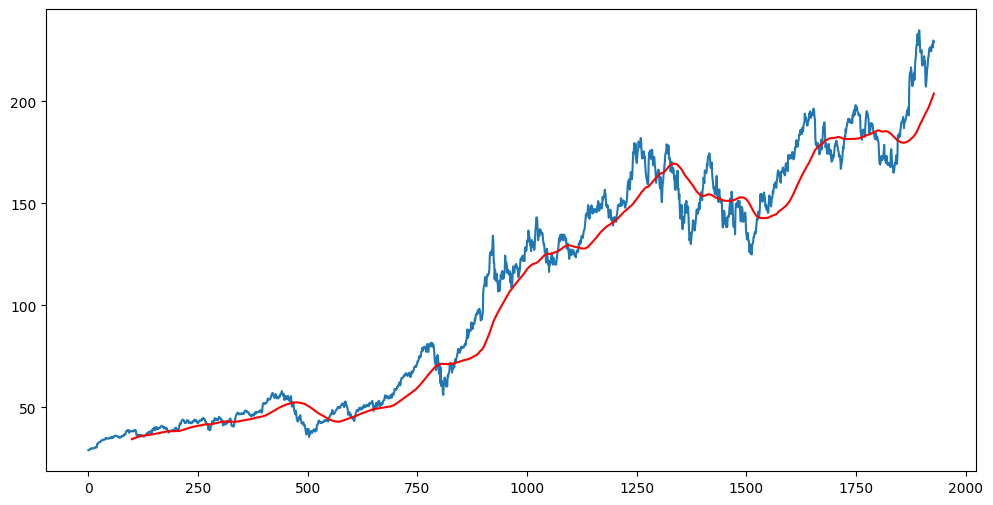

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1923    193.22270
1924    193.44840
1925    193.66880
1926    193.88575
1927    194.10675
Name: Close, Length: 1928, dtype: float64

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

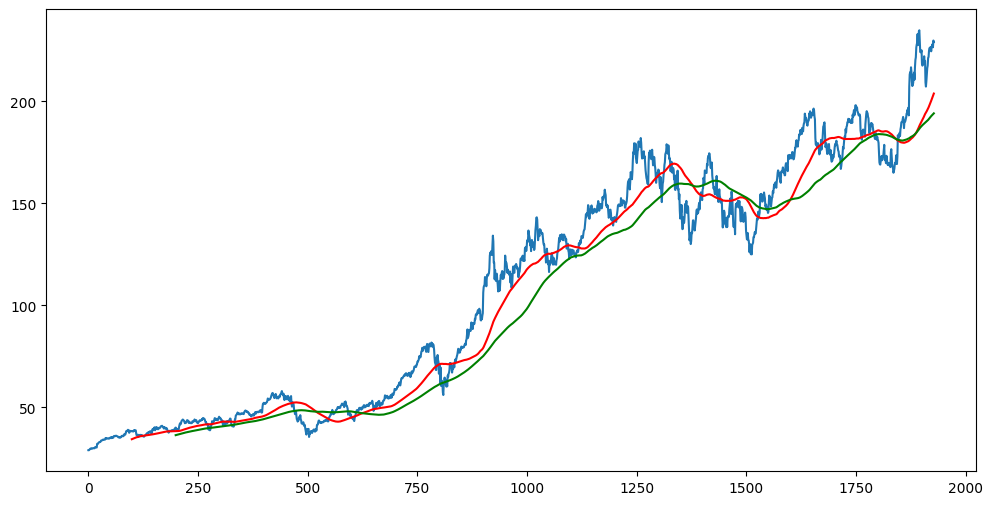

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(1928, 5)

In [15]:
# Splitting Data into training and Testing
import pandas as pd

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1349, 1)
(579, 1)


In [16]:
data_training.head()

,Close
0,29.037500
1,29.004999
2,29.152500
3,29.477501
4,29.747499


In [17]:
data_testing.head()

,Close
1349,142.559998
1350,147.110001
1351,145.539993
1352,149.240005
1353,140.820007


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[2.12419344e-04],
       [0.00000000e+00],
       [9.64027295e-04],
       ...,
       [8.04254777e-01],
       [8.20267306e-01],
       [7.67916110e-01]])

In [20]:
data_training_array.shape

(1349, 1)

In [21]:
import numpy as np
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
# ML  Model

In [23]:
pip install tensorflow keras



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install theano keras


  Using cached Theano-1.0.5.tar.gz (2.8 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      /private/var/folders/1h/d_3ywtf16m90d9_fhv4wb8p80000gn/T/pip-install-z61mpl33/theano_e88527df75054f7f97bb1489a59f3029/versioneer.py:421: SyntaxWarning: invalid escape sequence '\s'
        LONG_VERSION_PY['git'] = '''
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/1h/d_3ywtf16m90d9_fhv4wb8p80000gn/T/pip-install-z61mpl33/theano_e88527df75054f7f97bb1489a59f3029/setup.py", line 74, in <module>
          version_data = versioneer.get_versions()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/private/var/folders/1h/d_3ywtf16m90d9_fhv4wb8p80000gn/T/pip-install-z61mpl33/theano_e88527df75054f7f97bb1489a59f3029/versi

In [25]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.1322
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0321
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0083
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0079
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0073
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0067
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0076
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0061
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0172
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0064
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0054
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0069
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0052
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0058
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - lo

In [29]:
model.save('my_model.keras')

In [30]:
data_testing.head()

,Close
1349,142.559998
1350,147.110001
1351,145.539993
1352,149.240005
1353,140.820007


In [31]:
data_training.tail(100)

,Close
1249,171.139999
1250,169.750000
1251,172.990005
1252,175.639999
1253,176.279999
...,...
1344,156.770004
1345,157.279999
1346,152.059998
1347,154.509995


In [32]:
past_100_days = data_training.tail(100)

In [33]:
import pandas as pd

# Assuming you have two DataFrames: past_100_days and data_testing

# Concatenate the two DataFrames
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [34]:
final_df.head()

,Close
0,171.139999
1,169.750000
2,172.990005
3,175.639999
4,176.279999


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[4.20036414e-01],
       [4.07377040e-01],
       [4.36885284e-01],
       [4.61020017e-01],
       [4.66848790e-01],
       [5.03734060e-01],
       [4.94262216e-01],
       [4.95081994e-01],
       [4.84335110e-01],
       [4.78597501e-01],
       [5.19034538e-01],
       [4.97996311e-01],
       [4.54462629e-01],
       [4.27868841e-01],
       [4.29417094e-01],
       [4.29599282e-01],
       [4.55919857e-01],
       [4.60018190e-01],
       [4.29599282e-01],
       [4.37613898e-01],
       [4.07832441e-01],
       [3.75318717e-01],
       [3.59653862e-01],
       [3.40528264e-01],
       [3.33333287e-01],
       [3.16575581e-01],
       [3.15755942e-01],
       [3.11475421e-01],
       [4.12659388e-01],
       [4.53187589e-01],
       [4.51639336e-01],
       [4.62841482e-01],
       [4.36065506e-01],
       [4.31420748e-01],
       [4.24772336e-01],
       [4.53642990e-01],
       [4.66848790e-01],
       [4.28961693e-01],
       [3.97267746e-01],
       [3.99453588e-01],


In [36]:
input_data.shape

(679, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i -100:i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(579, 100, 1)
(579,)


In [39]:
# Making Predictions

y_predicted = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [40]:
y_predicted.shape

(579, 1)

In [41]:
y_test

array([1.59744984e-01, 2.01183987e-01, 1.86885197e-01, 2.20582937e-01,
       1.43898080e-01, 1.12295157e-01, 1.14480860e-01, 1.64754118e-01,
       1.39708584e-01, 1.41165812e-01, 1.70856105e-01, 2.24225868e-01,
       2.16939867e-01, 2.15755991e-01, 2.38524659e-01, 1.85428108e-01,
       1.92349733e-01, 2.15755991e-01, 2.08925390e-01, 1.60473598e-01,
       1.10291503e-01, 6.24773003e-02, 7.04917770e-02, 9.48086978e-02,
       4.59016432e-02, 5.95628441e-02, 9.88160056e-02, 9.40802227e-02,
       1.20674010e-01, 1.51548319e-01, 1.51548319e-01, 1.13114796e-01,
       1.29417101e-01, 1.06557408e-01, 1.26684833e-01, 1.50637516e-01,
       1.63023677e-01, 1.94262362e-01, 2.00546398e-01, 1.80783211e-01,
       1.89799653e-01, 1.86429935e-01, 2.13570148e-01, 2.29052815e-01,
       2.00819750e-01, 2.36612029e-01, 2.55191201e-01, 2.76229567e-01,
       2.64754070e-01, 2.54371563e-01, 2.42076565e-01, 2.89344204e-01,
       2.94444502e-01, 3.41438927e-01, 3.32331460e-01, 3.18670259e-01,
      

In [42]:
y_predicted

array([[0.3396316 ],
       [0.33258027],
       [0.3250271 ],
       [0.31703645],
       [0.30882978],
       [0.30051005],
       [0.2921278 ],
       [0.2837213 ],
       [0.27533078],
       [0.26647857],
       [0.2570939 ],
       [0.24744973],
       [0.23785238],
       [0.22872798],
       [0.22046426],
       [0.2137336 ],
       [0.20858663],
       [0.20485795],
       [0.20236695],
       [0.20097755],
       [0.20041761],
       [0.20024972],
       [0.19912073],
       [0.19578719],
       [0.18985094],
       [0.18254672],
       [0.17464678],
       [0.16633148],
       [0.15799145],
       [0.15007035],
       [0.14305755],
       [0.13735506],
       [0.1330893 ],
       [0.13020146],
       [0.12847435],
       [0.12775038],
       [0.12771115],
       [0.12813051],
       [0.12898526],
       [0.13025063],
       [0.13193405],
       [0.13404477],
       [0.13657005],
       [0.13954851],
       [0.14288488],
       [0.14660777],
       [0.15078321],
       [0.155

In [43]:
scaler.scale_

array([0.00910747])

In [44]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

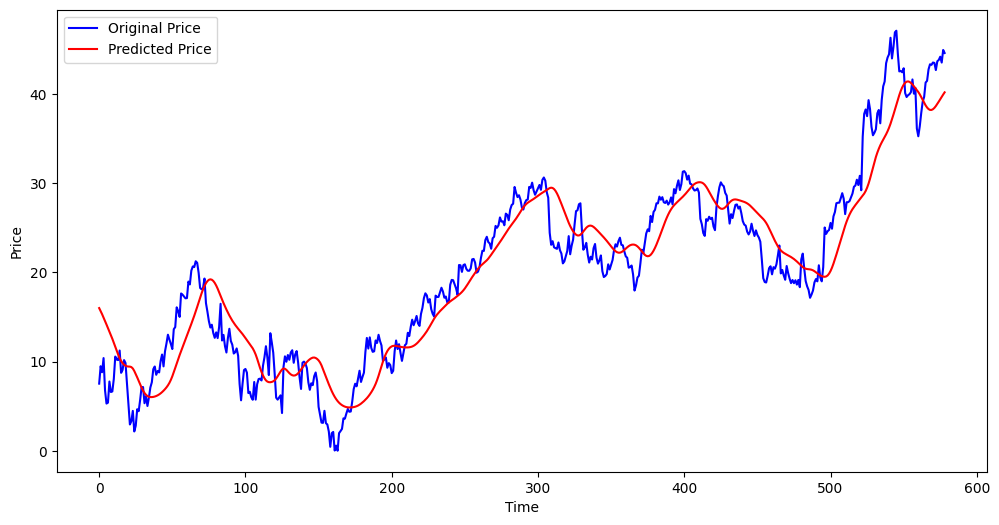

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

In [46]:
import yfinance as yf

start = '2017-01-01'
end = '2022-12-31'

# Retrieve historical stock data for AAPL from Yahoo Finance using yfinance
df = yf.download('AAPL', start=start, end=end)

# Print the first few rows of the DataFrame
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-01-03  28.950001  29.082500  28.690001  29.037500  26.921549  115127600
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.891413   84472400
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.028170   88774400
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.329481  127007600
2017-01-09  29.487499  29.857500  29.485001  29.747499  27.579813  134247600
